# 0 - Análise de Dados sobre Ocorrências Aeronáuticas na Aviação Civil Brasileira
## 1 - Entendimento e Tratamento dos Dados
### 1.1 Carregamento da Tabela de Ocorrências
## 1.2 Tratamento de Valores Ausentes — Ocorrência
## 1.3 Carregamento da Tabela de Aeronaves
## 1.4 Tratamento de Valores Ausentes — Aeronave
## 1.5 Integração Inicial: Ocorrência + Aeronave
## 1.6 Carregamento da Tabela de Fatores Contribuintes
## 1.7 Padronização e Conversão da Tabela de Fatores
## 1.8 Agregação de Fatores por Ocorrência
## 1.9 Integração Final de Tabelas
## 1.10 Análise e Tratamento de Outliers
## 1.11 Salvamento do Dataset Tratado



# 0 - Análise de Dados sobre Ocorrências Aeronáuticas na Aviação Civil Brasileira

Este projeto tem como objetivo analisar dados públicos de ocorrências aeronáuticas disponibilizados pelo CENIPA, a fim de identificar padrões, fatores contribuintes e insights relevantes para a segurança da aviação civil.





 Foi verificado o envio de 3 arquivos para o Desafio, que são:

1.   Dicionário de dados
2.   aeronave.csv
3.   ocorrencia.csv










In [57]:
#Importando principais bibliotecas a serem utilizadas

import pandas as pd
import numpy as np
import chardet #biblioteca para verificar o encoding do arquivo
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Entendimento e Tratamento dos Dados

A primeira etapa do projeto consiste no carregamento, inspeção, limpeza e integração das três tabelas principais:

- `ocorrencia.csv` — dados do evento
- `aeronave.csv` — informações da(s) aeronave(s)
- `fator_contribuinte.csv` — fatores investigados como causa do evento


## 1.1 Carregamento da Tabela de Ocorrências

- Importação dos dados brutos da tabela `ocorrencia.csv` e inspeção inicial das variáveis disponíveis.


In [58]:
#Verificando tamanho da tabela ocorrencia

ocorrencia = '/content/drive/MyDrive/DESAFIOA3DATA/ocorrencia.csv'
df_ocorrencia = pd.read_csv(ocorrencia )
print(df_ocorrencia.columns.tolist())
print("Número de linhas:", df_ocorrencia.shape[0])
print("Número de colunas:", df_ocorrencia.shape[1])
print("Ocorrência - Campos com valores ausentes:")

missing = df_ocorrencia.isnull().mean()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)
df_ocorrencia.head()

['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf', 'pais', 'aerodromo', 'dia_ocorrencia', 'horario', 'sera_investigada', 'comando_investigador', 'status_investigacao', 'numero_relatorio', 'relatorio_publicado', 'dia_publicacao', 'quantidade_recomendacoes', 'aeronaves_envolvidas', 'saida_pista', 'dia_extracao']
Número de linhas: 2027
Número de colunas: 19
Ocorrência - Campos com valores ausentes:
saida_pista            0.873705
relatorio_publicado    0.509127
dia_publicacao         0.509127
status_investigacao    0.101628
numero_relatorio       0.101628
aerodromo              0.001480
dtype: float64


,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,SERIPA-7,FINALIZADA,IG-209/CENIPA/2013,1.0,2014-04-07,0,1,NaN,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,SERIPA-7,FINALIZADA,A - 517/CENIPA/2016,1.0,2016-07-07,0,1,1.0,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,SERIPA-7,FINALIZADA,A-105/CENIPA/2012,1.0,2012-09-20,4,1,NaN,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,SERIPA-5,ATIVA,A DEFINIR,NaN,NaN,0,1,NaN,2016-07-30


## 1.2 Tratamento de Valores Ausentes — Ocorrência

- Análise de colunas com valores faltantes e aplicação de estratégias de imputação, exclusão ou transformação com base na relevância da variável.


In [59]:
df_ocorrencia['saida_pista'] = df_ocorrencia['saida_pista'].fillna(0)

df_ocorrencia['relatorio_publicado'] = df_ocorrencia['relatorio_publicado'].fillna(0)

df_ocorrencia['dia_publicacao'] = pd.to_datetime(df_ocorrencia['dia_publicacao'], errors='coerce')
df_ocorrencia['dia_publicacao'] = df_ocorrencia['dia_publicacao'].fillna(pd.NaT)

df_ocorrencia['status_investigacao'] = df_ocorrencia['status_investigacao'].fillna('INATIVA')

df_ocorrencia['numero_relatorio'] = df_ocorrencia['numero_relatorio'].fillna(0)

df_ocorrencia['aerodromo'] = df_ocorrencia['aerodromo'].replace(['****', '***', '', None, np.nan], 'N/A')

# mudanças

print("\nApós tratamento de valores ausentes:")
print(df_ocorrencia.isnull().mean()[df_ocorrencia.isnull().mean() > 0].sort_values(ascending=False))
print("\nVerificando algumas linhas após o tratamento:")
print(df_ocorrencia.head())



Após tratamento de valores ausentes:
dia_publicacao    0.509127
dtype: float64

Verificando algumas linhas após o tratamento:
   codigo_ocorrencia    classificacao                       tipo  localidade  \
0              47965         ACIDENTE      FALHA DO MOTOR EM VOO   ARIQUEMES   
1              50313  INCIDENTE GRAVE             POUSO SEM TREM      CACOAL   
2              34078         ACIDENTE  PERDA DE CONTROLE NO SOLO  CEREJEIRAS   
3              44988         ACIDENTE                POUSO LONGO     AMAJARI   
4              38855         ACIDENTE   PERDA DE CONTROLE EM VOO      ACEGUÁ   

   uf    pais aerodromo dia_ocorrencia   horario sera_investigada  \
0  RO  BRASIL      SJOG     2013-05-05  11:00:00              ***   
1  RO  BRASIL      SSKW     2013-11-25  12:32:00              SIM   
2  RO  BRASIL       N/A     2008-08-07  15:10:00              SIM   
3  RR  BRASIL       N/A     2011-08-11  17:00:00              SIM   
4  RS  BRASIL       N/A     2009-12-28  17:30:0

In [60]:
# Lista com todos os campos e quantidade de linhas

print("\nLista com todos os campos e quantidade de linhas da tabela df_ocorrencia:")
for column in df_ocorrencia.columns:
  print(f"{column}: {df_ocorrencia[column].count()}")


Lista com todos os campos e quantidade de linhas da tabela df_ocorrencia:
codigo_ocorrencia: 2027
classificacao: 2027
tipo: 2027
localidade: 2027
uf: 2027
pais: 2027
aerodromo: 2027
dia_ocorrencia: 2027
horario: 2027
sera_investigada: 2027
comando_investigador: 2027
status_investigacao: 2027
numero_relatorio: 2027
relatorio_publicado: 2027
dia_publicacao: 995
quantidade_recomendacoes: 2027
aeronaves_envolvidas: 2027
saida_pista: 2027
dia_extracao: 2027


In [61]:
#Verificando a chave PK (codigo_ocorrencia) da tabela ocorrência

unicidade = df_ocorrencia['codigo_ocorrencia'].is_unique

if unicidade:
  print("A coluna 'codigo_ocorrencia' da tabela 'ocorrencia' possui valores unicos.")
else:
  print("A coluna 'codigo_ocorrencia' da tabela 'ocorrencia' possui valores duplicados.")


A coluna 'codigo_ocorrencia' da tabela 'ocorrencia' possui valores unicos.


## 1.3 Carregamento da Tabela de Aeronaves

Importação dos dados da(s) aeronave(s) envolvida(s) nas ocorrências, incluindo tipo, fabricante, número de motores, peso de decolagem etc.


- Essa tabela registra informações detalhadas sobre as aeronaves envolvidas nas ocorrências aeronáuticas.

In [62]:
#verificando o tamanho da tabela aeronave

aeronave = '/content/drive/MyDrive/DESAFIOA3DATA/aeronave.csv'
df_aeronave = pd.read_csv(aeronave)
df_aeronave.head()

print(df_aeronave.columns.tolist())
print("Número de linhas:", df_aeronave.shape[0])
print("Número de colunas:", df_aeronave.shape[1])
print("Aeronave - Campos com valores ausentes:")

missing = df_aeronave.isnull().mean()
missing = missing[missing > 0].sort_values(ascending=False)

print(missing)
df_aeronave.head()

['codigo_aeronave', 'codigo_ocorrencia', 'matricula', 'codigo_operador', 'equipamento', 'fabricante', 'modelo', 'tipo_motor', 'quantidade_motores', 'peso_maximo_decolagem', 'quantidade_assentos', 'ano_fabricacao', 'pais_registro', 'categoria_registro', 'categoria_aviacao', 'origem_voo', 'destino_voo', 'fase_operacao', 'tipo_operacao', 'nivel_dano', 'quantidade_fatalidades', 'dia_extracao']
Número de linhas: 2043
Número de colunas: 22
Aeronave - Campos com valores ausentes:
quantidade_fatalidades    0.826236
quantidade_assentos       0.008811
quantidade_motores        0.004405
ano_fabricacao            0.001958
dtype: float64


,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,4,45602,PPGXE,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,NaN,2016-07-30
1,40,53551,PPGSZ,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,DECOLAGEM,INSTRUÇÃO,LEVE,NaN,2016-07-30
2,118,43721,PTCMT,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,2310,...,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
3,130,35556,PTEQI,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633,...,BRASIL,TPP,PARTICULAR,SNDU,SBSL,CORRIDA APÓS POUSO,PRIVADA,LEVE,NaN,2016-07-30
4,191,32579,PPVMM,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,52389,...,BRASIL,TPR,REGULAR,****,****,SUBIDA,REGULAR,NENHUM,NaN,2016-07-30



## 1.4 Tratamento de Valores Ausentes — Aeronave

- Tratamento de colunas incompletas ou inconsistentes e padronização de tipos.


In [63]:
# Tratar os valores "****" em 'origem_voo' e 'destino_voo' para "N/A"

df_aeronave['origem_voo'] = df_aeronave['origem_voo'].replace(['****', '***', '', None, np.nan], 'N/A')
df_aeronave['destino_voo'] = df_aeronave['destino_voo'].replace(['****', '***', '', None, np.nan], 'N/A')

# quantidade_fatalidades: preencher com 0

df_aeronave['quantidade_fatalidades'] = df_aeronave['quantidade_fatalidades'].fillna(0)

# quantidade_assentos: preencher com a mediana pois é bem improvável uma aeronave sem assentos.

df_aeronave['quantidade_assentos'] = df_aeronave['quantidade_assentos'].fillna(df_aeronave['quantidade_assentos'].median())

# quantidade_motores: preencher com a moda pois é bastante improvável aeronaves sem motores (a não ser planadores)

df_aeronave['quantidade_motores'] = df_aeronave['quantidade_motores'].fillna(df_aeronave['quantidade_motores'].mode()[0])

# ano_fabricacao: preencher com 0

df_aeronave['ano_fabricacao'] = pd.to_datetime(df_aeronave['ano_fabricacao'], format='%Y', errors='coerce')

# Verificando

print("\nApós tratamento de valores ausentes na tabela aeronave:")
print(df_aeronave.isnull().mean()[df_aeronave.isnull().mean() > 0].sort_values(ascending=False))
print("\nVerificando algumas linhas após o tratamento:")
print(df_aeronave.head())
print("Aeronave - Campos com valores ausentes:")

missing = df_aeronave.isnull().mean()
missing = missing[missing > 0].sort_values(ascending=False)
missing
print(missing)
df_aeronave.head()


Após tratamento de valores ausentes na tabela aeronave:
ano_fabricacao    0.044542
dtype: float64

Verificando algumas linhas após o tratamento:
   codigo_aeronave  codigo_ocorrencia matricula  codigo_operador equipamento  \
0                4              45602     PPGXE              241       AVIÃO   
1               40              53551     PPGSZ              160       AVIÃO   
2              118              43721     PTCMT             1232       AVIÃO   
3              130              35556     PTEQI             3992       AVIÃO   
4              191              32579     PPVMM             4365       AVIÃO   

                    fabricante    modelo tipo_motor  quantidade_motores  \
0  NEIVA INDUSTRIA AERONAUTICA      56-C     PISTÃO                 1.0   
1  NEIVA INDUSTRIA AERONAUTICA      56-C     PISTÃO                 1.0   
2               BEECH AIRCRAFT    95-B55     PISTÃO                 2.0   
3  NEIVA INDUSTRIA AERONAUTICA  EMB-721C     PISTÃO                 1.0  

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,4,45602,PPGXE,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,0.0,2016-07-30
1,40,53551,PPGSZ,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,DECOLAGEM,INSTRUÇÃO,LEVE,0.0,2016-07-30
2,118,43721,PTCMT,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,2310,...,BRASIL,TPX,TÁXI AÉREO,N/A,N/A,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,0.0,2016-07-30
3,130,35556,PTEQI,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633,...,BRASIL,TPP,PARTICULAR,SNDU,SBSL,CORRIDA APÓS POUSO,PRIVADA,LEVE,0.0,2016-07-30
4,191,32579,PPVMM,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,52389,...,BRASIL,TPR,REGULAR,N/A,N/A,SUBIDA,REGULAR,NENHUM,0.0,2016-07-30


In [64]:
#Verificando a chave PK (codigo_ocorrencia) da tabela aeronave

unicidade = df_aeronave['codigo_ocorrencia'].is_unique

if unicidade:
  print("a coluna 'codigo_ocorrencia' da tabela 'df_aeronave' possui valores unicos.")
else:
  print("a coluna 'codigo_ocorrencia' da tabela 'df_aeronave' possui valores duplicados.")


a coluna 'codigo_ocorrencia' da tabela 'df_aeronave' possui valores duplicados.


In [65]:
# Lista com todos os campos e quantidade de linhas

print("\nLista com todos os campos e quantidade de linhas da tabela df_aeronave:")
for column in df_aeronave.columns:
  print(f"{column}: {df_aeronave[column].count()}")


Lista com todos os campos e quantidade de linhas da tabela df_aeronave:
codigo_aeronave: 2043
codigo_ocorrencia: 2043
matricula: 2043
codigo_operador: 2043
equipamento: 2043
fabricante: 2043
modelo: 2043
tipo_motor: 2043
quantidade_motores: 2043
peso_maximo_decolagem: 2043
quantidade_assentos: 2043
ano_fabricacao: 1952
pais_registro: 2043
categoria_registro: 2043
categoria_aviacao: 2043
origem_voo: 2043
destino_voo: 2043
fase_operacao: 2043
tipo_operacao: 2043
nivel_dano: 2043
quantidade_fatalidades: 2043
dia_extracao: 2043


## 1.5 Integração Inicial: Ocorrência + Aeronave

- Realiza-se o **merge** entre as tabelas `ocorrencia` e `aeronave` por meio de uma chave comum (ex: `codigo_ocorrencia`).



In [66]:
df_ocorrencia_aeronave = pd.merge(
    df_ocorrencia,
    df_aeronave,
    on='codigo_ocorrencia',
    how='left',
    suffixes=('_ocorrencia', '_aeronave')  # para diferenciar colunas repetidas
)

# Manter somente 'dia_extracao' da ocorrência e remover a da aeronave

df_ocorrencia_aeronave['dia_extracao'] = df_ocorrencia_aeronave['dia_extracao_ocorrencia']
df_ocorrencia_aeronave = df_ocorrencia_aeronave.drop(columns=['dia_extracao_ocorrencia', 'dia_extracao_aeronave'])

# Verificar resultado

print("Shape do dataframe após merge:", df_ocorrencia_aeronave.shape)
print("ocorrencia_aeronave - Campos com valores ausentes:")

missing = df_ocorrencia_aeronave.isnull().mean()
missing = missing[missing > 0].sort_values(ascending=False)

print(missing)
df_ocorrencia_aeronave.head()

Shape do dataframe após merge: (2043, 39)
ocorrencia_aeronave - Campos com valores ausentes:
dia_publicacao    0.510034
ano_fabricacao    0.044542
dtype: float64


,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,...,BRASIL,PET,EXPERIMENTAL,N/A,N/A,CIRCUITO DE TRÁFEGO,EXPERIMENTAL,SUBSTANCIAL,0.0,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,...,BRASIL,TPX,TÁXI AÉREO,SBJI,SSKW,POUSO,TÁXI AÉREO,SUBSTANCIAL,0.0,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,N/A,2008-08-07,15:10:00,SIM,...,BRASIL,TPX,TÁXI AÉREO,SWKK,SWRL,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,0.0,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,N/A,2011-08-11,17:00:00,SIM,...,BRASIL,TPX,TÁXI AÉREO,N/A,N/A,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,0.0,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,N/A,2009-12-28,17:30:00,SIM,...,BRASIL,SAE,ESPECIALIZADA,N/A,N/A,DECOLAGEM,ESPECIALIZADA,SUBSTANCIAL,1.0,2016-07-30


In [67]:
# Lista com todos os campos e quantidade de linhas da tabela merge de df_ocorrencia e df_aeronave

print("\nLista com todos os campos e quantidade de linhas da tabela df_ocorrencia:")
for column in df_ocorrencia_aeronave.columns:
  print(f"{column}: {df_ocorrencia_aeronave[column].count()}")


Lista com todos os campos e quantidade de linhas da tabela df_ocorrencia:
codigo_ocorrencia: 2043
classificacao: 2043
tipo: 2043
localidade: 2043
uf: 2043
pais: 2043
aerodromo: 2043
dia_ocorrencia: 2043
horario: 2043
sera_investigada: 2043
comando_investigador: 2043
status_investigacao: 2043
numero_relatorio: 2043
relatorio_publicado: 2043
dia_publicacao: 1001
quantidade_recomendacoes: 2043
aeronaves_envolvidas: 2043
saida_pista: 2043
codigo_aeronave: 2043
matricula: 2043
codigo_operador: 2043
equipamento: 2043
fabricante: 2043
modelo: 2043
tipo_motor: 2043
quantidade_motores: 2043
peso_maximo_decolagem: 2043
quantidade_assentos: 2043
ano_fabricacao: 1952
pais_registro: 2043
categoria_registro: 2043
categoria_aviacao: 2043
origem_voo: 2043
destino_voo: 2043
fase_operacao: 2043
tipo_operacao: 2043
nivel_dano: 2043
quantidade_fatalidades: 2043
dia_extracao: 2043



## 1.6 Carregamento da Tabela de Fatores Contribuintes

Importação dos dados da tabela `fator_contribuinte.csv`, que traz os fatores observados durante a investigação oficial de cada ocorrência.


- No dicionário de dados consta relacionamentos entre 3 tabelas, faltando então a tabela "fator_contribuinte", que foi imediatamente obtida no site de dados abertos do governo federal, disponível em: [Dados abertos - Força Aérea Brasileira](https://dados.gov.br/dados/conjuntos-dados/ocorrencias-aeronauticas-da-aviacao-civil-brasileira)



-   A tabela "fator_contribuinte continha o encoding ISO-8859-1 e separador ";" ao invés de ",". Foi salvo posteriormente como .csv e substituído o separador ";" por ","



In [68]:
#Verificando o encoding do arquivo com chardet

caminho = '/content/drive/MyDrive/DESAFIOA3DATA/fator_contribuinte.csv'

with open(caminho, 'rb') as f:
    resultado = chardet.detect(f.read())
    print(f"Encoding detectado: {resultado['encoding']}")

Encoding detectado: ISO-8859-1



## 1.7 Padronização e Conversão da Tabela de Fatores

- Alteração do encoding e separadores da tabela


In [69]:
#Código para conversão de arquivo.

caminho_original = '/content/drive/MyDrive/DESAFIOA3DATA/fator_contribuinte.csv'
caminho_convertido = '/content/drive/MyDrive/DESAFIOA3DATA/fator_contribuinte_utf8.csv'

# Ler o arquivo com o encoding original e o separador ';'

df_fator_contribuinte = pd.read_csv(caminho_original, encoding='ISO-8859-1', sep=';')

# Salvar o DataFrame com encoding UTF-8 e separador ','

df_fator_contribuinte.to_csv(caminho_convertido, encoding='utf-8', sep=',', index=False)

print(f"Arquivo convertido e salvo em: {caminho_convertido}")

# Verificação das primeiras linhas

df_fator_contribuinte_utf8 = pd.read_csv(caminho_convertido)
print("\nPrimeiras linhas do arquivo convertido:")
print(df_fator_contribuinte_utf8.head())
print("Número de linhas:", df_fator_contribuinte_utf8.shape[0])
print("Número de colunas:", df_fator_contribuinte_utf8.shape[1])
missing = df_fator_contribuinte.isnull().mean()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

Arquivo convertido e salvo em: /content/drive/MyDrive/DESAFIOA3DATA/fator_contribuinte_utf8.csv

Primeiras linhas do arquivo convertido:
   codigo_ocorrencia                         fator_nome  \
0              85239              APLICAÇÃO DE COMANDOS   
1              85239                            ATITUDE   
2              85239  CONDIÇÕES METEOROLÓGICAS ADVERSAS   
3              85239                          PERCEPÇÃO   
4              85239                 PROCESSO DECISÓRIO   

                                    fator_aspecto   fator_condicionante  \
0                        DESEMPENHO DO SER HUMANO  OPERAÇÃO DA AERONAVE   
1                             ASPECTO PSICOLÓGICO            INDIVIDUAL   
2  ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL                   ***   
3                             ASPECTO PSICOLÓGICO            INDIVIDUAL   
4                             ASPECTO PSICOLÓGICO            INDIVIDUAL   

          fator_area  
0  FATOR OPERACIONAL  
1       FAT

Verificando como ficou a tabela "fator_contribuinte" tratada

In [70]:
fator_contribuinte_utf8 = '/content/drive/MyDrive/DESAFIOA3DATA/fator_contribuinte_utf8.csv'
df_fator_contribuinte_utf8 = pd.read_csv(fator_contribuinte_utf8 )

print(df_fator_contribuinte_utf8.columns.tolist())

print("Número de linhas:", df_fator_contribuinte_utf8.shape[0])
print("Número de colunas:", df_fator_contribuinte_utf8.shape[1])
print("\nPrimeiras linhas do arquivo:")

print("fator_contribuinte - Campos com valores ausentes:")

missing = df_fator_contribuinte_utf8.isnull().mean()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

df_ocorrencia_aeronave.head()

print(df_fator_contribuinte_utf8.head(20))

['codigo_ocorrencia', 'fator_nome', 'fator_aspecto', 'fator_condicionante', 'fator_area']
Número de linhas: 8613
Número de colunas: 5

Primeiras linhas do arquivo:
fator_contribuinte - Campos com valores ausentes:
Series([], dtype: float64)
    codigo_ocorrencia                         fator_nome  \
0               85239              APLICAÇÃO DE COMANDOS   
1               85239                            ATITUDE   
2               85239  CONDIÇÕES METEOROLÓGICAS ADVERSAS   
3               85239                          PERCEPÇÃO   
4               85239                 PROCESSO DECISÓRIO   
5               85145                        OUTRO FATOR   
6               84857                            ATITUDE   
7               84857            JULGAMENTO DE PILOTAGEM   
8               84857                          MOTIVAÇÃO   
9               84857                PLANEJAMENTO DE VOO   
10              84792              APLICAÇÃO DE COMANDOS   
11              84792  CONDIÇÕES METEOR

In [71]:
# Lista com todos os campos e quantidade de linhas da tabela df_fator_contribuinte_utf8

print("\nLista com todos os campos e quantidade de linhas da tabela df_fator_contribuinte_utf8:")
for column in df_fator_contribuinte_utf8.columns:
  print(f"{column}: {df_fator_contribuinte_utf8[column].count()}")


Lista com todos os campos e quantidade de linhas da tabela df_fator_contribuinte_utf8:
codigo_ocorrencia: 8613
fator_nome: 8613
fator_aspecto: 8613
fator_condicionante: 8613
fator_area: 8613


In [72]:
unicidade = df_fator_contribuinte_utf8['codigo_ocorrencia'].is_unique

if unicidade:
  print("a coluna 'codigo_ocorrencia' da tabela 'df_fator_contribuinte_utf8' possui valores unicos.")
else:
  print("a coluna 'codigo_ocorrencia' da tabela 'df_fator_contribuinte_utf8' possui valores duplicados.")

a coluna 'codigo_ocorrencia' da tabela 'df_fator_contribuinte_utf8' possui valores duplicados.


## 1.8 Agregação do campo fator_contribuinte

- Transformação do campo fator_contribuinte em colunas binárias agregadas por ocorrência, do tipo "presença/ausência de determinado fator" (ex: `fator_area_FATOR HUMANO = 1`).


- Abaixo foi realizado o processo de codificação One-Hot na coluna fator_area, utilizando codigo_ocorrencia como chave de agrupamento. Esse procedimento permitiu transformar os tipos gerais de fatores contribuintes em variáveis binárias (0 ou 1) por ocorrência, evitando a duplicação de registros e o aumento excessivo da dimensionalidade (explosão de dados).

In [73]:
df_fator_area = df_fator_contribuinte_utf8[['codigo_ocorrencia', 'fator_area']]

# Aplicação do onehot

df_fator_onehot = pd.get_dummies(
    df_fator_area,
    columns=['fator_area'],
    prefix='fator_area',
    dtype=int
)

# Agregação ao qual o fator aparece ao menos uma vez

fatores_agg = df_fator_onehot.groupby('codigo_ocorrencia').max().reset_index()

# Verificar o resultado

print("\n One-Hot Encoding aplicado corretamente!")
print("Número de colunas após agregação:", fatores_agg.shape[1])
print("Número de linhas após agregação:", fatores_agg.shape[0])
print("\nPrimeiras linhas da tabela agregada:")
print(fatores_agg.head())




 One-Hot Encoding aplicado corretamente!
Número de colunas após agregação: 5
Número de linhas após agregação: 2122

Primeiras linhas da tabela agregada:
   codigo_ocorrencia  fator_area_FATOR HUMANO  fator_area_FATOR MATERIAL  \
0              28256                        0                          0   
1              28335                        0                          0   
2              28355                        0                          0   
3              28375                        0                          0   
4              28377                        0                          0   

   fator_area_FATOR OPERACIONAL  fator_area_OUTRO  
0                             1                 0  
1                             1                 0  
2                             1                 0  
3                             1                 1  
4                             1                 1  


In [74]:
# Lista com todos os campos e quantidade de linhas da tabela fatores_agg

print("\nLista com todos os campos e quantidade de linhas da tabela fatores_agg:")
for column in fatores_agg.columns:
  print(f"{column}: {fatores_agg[column].count()}")


Lista com todos os campos e quantidade de linhas da tabela fatores_agg:
codigo_ocorrencia: 2122
fator_area_FATOR HUMANO: 2122
fator_area_FATOR MATERIAL: 2122
fator_area_FATOR OPERACIONAL: 2122
fator_area_OUTRO: 2122


In [75]:
#Salvamento do arquivo fatores_agg em csv

caminho_fatores_agg = '/content/drive/MyDrive/DESAFIOA3DATA/fatores_agg.csv'

fatores_agg.to_csv(caminho_fatores_agg, index=False)

print(f"\nDataFrame 'fatores_agg' salvo com sucesso em: {caminho_fatores_agg}")


DataFrame 'fatores_agg' salvo com sucesso em: /content/drive/MyDrive/DESAFIOA3DATA/fatores_agg.csv


## 1.9 Integração Final de Tabelas

Realização do **merge final** entre `ocorrencia + aeronave (df_ocorrencia_aeronave) + fatores contribuintes`(fatores_agg), criando o dataset unificado a ser usado em todas as análises.


In [76]:

df_tab_analise = pd.merge(
    df_ocorrencia_aeronave,
    fatores_agg,
    on='codigo_ocorrencia',
    how='left'
)


print("\nShape do dataframe após merge final:", df_tab_analise.shape)
print("\nDataframe final - Campos com valores ausentes:")
missing = df_tab_analise.isnull().mean()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)
print("\nPrimeiras linhas do dataframe final:")
print(df_tab_analise.head())


Shape do dataframe após merge final: (2043, 43)

Dataframe final - Campos com valores ausentes:
dia_publicacao                  0.510034
fator_area_FATOR HUMANO         0.403328
fator_area_FATOR OPERACIONAL    0.403328
fator_area_FATOR MATERIAL       0.403328
fator_area_OUTRO                0.403328
ano_fabricacao                  0.044542
dtype: float64

Primeiras linhas do dataframe final:
   codigo_ocorrencia    classificacao                       tipo  localidade  \
0              47965         ACIDENTE      FALHA DO MOTOR EM VOO   ARIQUEMES   
1              50313  INCIDENTE GRAVE             POUSO SEM TREM      CACOAL   
2              34078         ACIDENTE  PERDA DE CONTROLE NO SOLO  CEREJEIRAS   
3              44988         ACIDENTE                POUSO LONGO     AMAJARI   
4              38855         ACIDENTE   PERDA DE CONTROLE EM VOO      ACEGUÁ   

   uf    pais aerodromo dia_ocorrencia   horario sera_investigada  ...  \
0  RO  BRASIL      SJOG     2013-05-05  11:00:00 

In [77]:
#Tratamento de valores nulos

fator_cols = ['fator_area_FATOR HUMANO', 'fator_area_FATOR MATERIAL', 'fator_area_FATOR OPERACIONAL', 'fator_area_OUTRO']
df_tab_analise[fator_cols] = df_tab_analise[fator_cols].fillna(0)

print("\nDataframe final - Campos com valores ausentes:")
missing = df_tab_analise.isnull().mean()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)
print("\nPrimeiras linhas do dataframe final:")
print(df_tab_analise.head())



Dataframe final - Campos com valores ausentes:
dia_publicacao    0.510034
ano_fabricacao    0.044542
dtype: float64

Primeiras linhas do dataframe final:
   codigo_ocorrencia    classificacao                       tipo  localidade  \
0              47965         ACIDENTE      FALHA DO MOTOR EM VOO   ARIQUEMES   
1              50313  INCIDENTE GRAVE             POUSO SEM TREM      CACOAL   
2              34078         ACIDENTE  PERDA DE CONTROLE NO SOLO  CEREJEIRAS   
3              44988         ACIDENTE                POUSO LONGO     AMAJARI   
4              38855         ACIDENTE   PERDA DE CONTROLE EM VOO      ACEGUÁ   

   uf    pais aerodromo dia_ocorrencia   horario sera_investigada  ...  \
0  RO  BRASIL      SJOG     2013-05-05  11:00:00              ***  ...   
1  RO  BRASIL      SSKW     2013-11-25  12:32:00              SIM  ...   
2  RO  BRASIL       N/A     2008-08-07  15:10:00              SIM  ...   
3  RR  BRASIL       N/A     2011-08-11  17:00:00              SIM  .

In [78]:
# Lista com todos os campos e quantidade de linhas da tabela df_tab_analise

print("\nLista com todos os campos e quantidade de linhas da tabela df_tab_analise:")
for column in df_tab_analise.columns:
  print(f"{column}: {df_tab_analise[column].count()}")


Lista com todos os campos e quantidade de linhas da tabela df_tab_analise:
codigo_ocorrencia: 2043
classificacao: 2043
tipo: 2043
localidade: 2043
uf: 2043
pais: 2043
aerodromo: 2043
dia_ocorrencia: 2043
horario: 2043
sera_investigada: 2043
comando_investigador: 2043
status_investigacao: 2043
numero_relatorio: 2043
relatorio_publicado: 2043
dia_publicacao: 1001
quantidade_recomendacoes: 2043
aeronaves_envolvidas: 2043
saida_pista: 2043
codigo_aeronave: 2043
matricula: 2043
codigo_operador: 2043
equipamento: 2043
fabricante: 2043
modelo: 2043
tipo_motor: 2043
quantidade_motores: 2043
peso_maximo_decolagem: 2043
quantidade_assentos: 2043
ano_fabricacao: 1952
pais_registro: 2043
categoria_registro: 2043
categoria_aviacao: 2043
origem_voo: 2043
destino_voo: 2043
fase_operacao: 2043
tipo_operacao: 2043
nivel_dano: 2043
quantidade_fatalidades: 2043
dia_extracao: 2043
fator_area_FATOR HUMANO: 2043
fator_area_FATOR MATERIAL: 2043
fator_area_FATOR OPERACIONAL: 2043
fator_area_OUTRO: 2043


## 1.10 Análise de Outliers




In [79]:
# Analisando o tipo de dado para selecionar os campos para verificação de existência de outliers

print("Tipos de dados da tabela df_tab_analise:")
df_tab_analise.dtypes

Tipos de dados da tabela df_tab_analise:


,0
codigo_ocorrencia,int64
classificacao,object
tipo,object
localidade,object
uf,object
pais,object
aerodromo,object
dia_ocorrencia,object
horario,object
sera_investigada,object


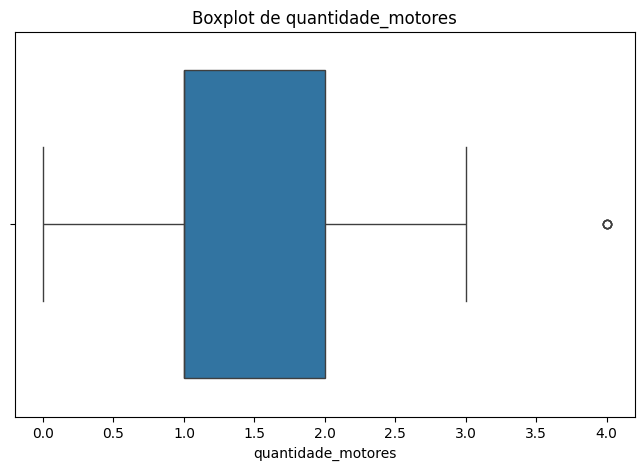


Outliers encontrados na coluna 'quantidade_motores':
      quantidade_motores
56                   4.0
615                  4.0
666                  4.0
1484                 4.0
Total de outliers na coluna 'quantidade_motores': 4


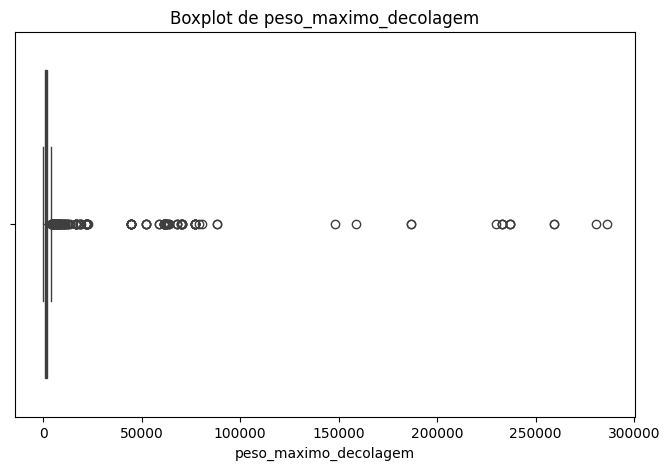


Outliers encontrados na coluna 'peso_maximo_decolagem':
    peso_maximo_decolagem
12                   5670
20                   4750
31                  70533
32                  44450
34                  22000
Total de outliers na coluna 'peso_maximo_decolagem': 226


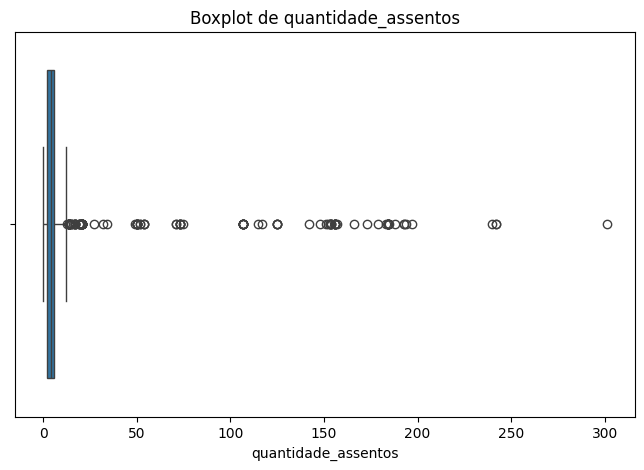


Outliers encontrados na coluna 'quantidade_assentos':
    quantidade_assentos
31                194.0
32                107.0
34                 71.0
35                 73.0
36                301.0
Total de outliers na coluna 'quantidade_assentos': 121


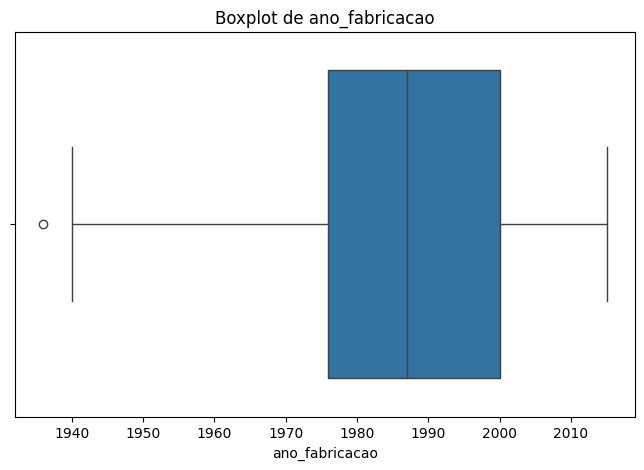


Outliers encontrados na coluna 'ano_fabricacao':
     ano_fabricacao
1167     1936-01-01
Total de outliers na coluna 'ano_fabricacao': 1


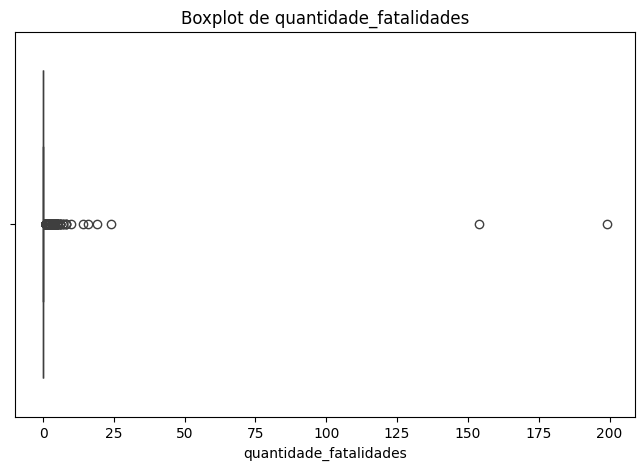


Outliers encontrados na coluna 'quantidade_fatalidades':
    quantidade_fatalidades
4                      1.0
7                      1.0
9                      1.0
10                     3.0
12                     3.0
Total de outliers na coluna 'quantidade_fatalidades': 355


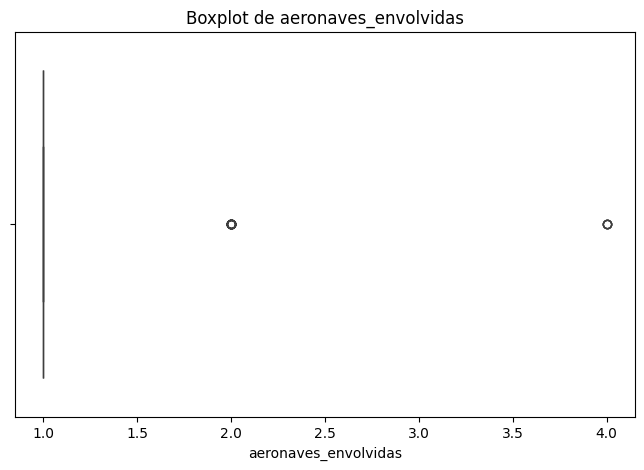


Outliers encontrados na coluna 'aeronaves_envolvidas':
     aeronaves_envolvidas
54                      2
55                      2
257                     2
258                     2
461                     2
Total de outliers na coluna 'aeronaves_envolvidas': 30


In [80]:
# Lista de colunas pertinentes para verificar outliers

colunas_outliers = [
    'quantidade_motores',
    'peso_maximo_decolagem',
    'quantidade_assentos',
    'ano_fabricacao',
    'quantidade_fatalidades',
    'aeronaves_envolvidas'
]
# Criando boxplots para cada coluna

for coluna in colunas_outliers:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=df_tab_analise[coluna])
  plt.title(f'Boxplot de {coluna}')
  plt.show()


  # Calculando o IQR e limites para identificar outliers

  Q1 = df_tab_analise[coluna].quantile(0.25)
  Q3 = df_tab_analise[coluna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  outliers = df_tab_analise[(df_tab_analise[coluna] < limite_inferior) | (df_tab_analise[coluna] > limite_superior)]


  print(f"\nOutliers encontrados na coluna '{coluna}':")
  print(outliers[[coluna]].head()) # Mostra apenas as primeiras linhas dos outliers para brevidade
  print(f"Total de outliers na coluna '{coluna}': {len(outliers)}")

In [81]:
# Analisando possível outlier de quantidade de aeronaves envolvidas

print(df_tab_analise[df_tab_analise['aeronaves_envolvidas'] == 4][['tipo','quantidade_recomendacoes','quantidade_fatalidades',  'modelo','fase_operacao','fator_area_FATOR OPERACIONAL','localidade']])

                              tipo  quantidade_recomendacoes  \
1906  COLISÃO COM AERONAVE NO SOLO                         0   
1907  COLISÃO COM AERONAVE NO SOLO                         0   
1908  COLISÃO COM AERONAVE NO SOLO                         0   
1909  COLISÃO COM AERONAVE NO SOLO                         0   

      quantidade_fatalidades        modelo     fase_operacao  \
1906                     0.0        C90GTI    ESTACIONAMENTO   
1907                     0.0            45    ESTACIONAMENTO   
1908                     0.0  HAWKER 800XP    ESTACIONAMENTO   
1909                     0.0   HAWKER 4000  PARTIDA DO MOTOR   

      fator_area_FATOR OPERACIONAL localidade  
1906                           1.0  SÃO PAULO  
1907                           1.0  SÃO PAULO  
1908                           1.0  SÃO PAULO  
1909                           1.0  SÃO PAULO  


## 1.11 Salvamento do Dataset Tratado

- Exportação do DataFrame consolidado para o diretório `data/processed/`, em formato `.csv`, para uso na análise exploratória e etapas posteriores do projeto.



In [82]:
df_tab_analise.to_csv('/content/drive/MyDrive/DESAFIOA3DATA/base_tratada/df_tab_analise.csv', index=False, encoding='utf-8')

✅ **Resultado da Etapa:**  
O conjunto de dados final está limpo, estruturado e pronto para ser explorado na próxima fase (`02_analise_exploratoria.ipynb`). Todas as tabelas foram integradas e padronizadas, com variáveis relevantes selecionadas e tratadas.